# Medical Appointment No Shows
Jericho Timbol
>Q1. Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. This problem can be posed as a binary classification problem to predict the label of the No-Show class. Labels = {Yes, No}. The data is available through Kaggle. The following set of variables are available for model creation: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.

# Setup and Loading the dataset

Setting up my modules, loading the data, and checking if the dataframe is working is the first step.

In [1]:
#Importing Utilized Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


#Load DataFrame
df = pd.read_csv("Med_Appoint_Data.csv")

#Drop na values
df = df.dropna(axis=0)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Exploratory Data Analysis

I am beginning the investigation by getting info on the data types in the dataset as well as checking for any null values. I am starting my proccess with the intention of investigating comparison statistics between the features and the target in order to uncover features with possibly high information gain.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,counts,normalized_counts
No,88208,0.798067
Yes,22319,0.201933


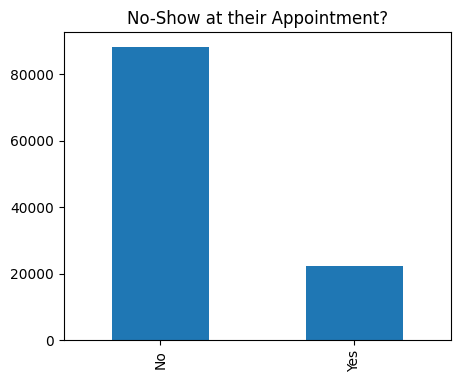

In [2]:
#Checking Data Type, Count, Columns
df.info()

#Plotting Target feature count
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
df["No-show"].value_counts().plot.bar(title ="No-Show at their Appointment?")

#Showing Count of No-show as well as relative frequency
pd.concat(
    [
        df["No-show"].value_counts(),
        df["No-show"].value_counts(normalize=True)
    ],
    keys=['counts', 'normalized_counts'],
    axis=1,
)

>After seeing this it is clear to see that there is a skew in data with "No" having almost 4x the count of "Yes"

>Similar to the method above, I loop through numerical features and display tables of all the features compared to the No-show column.

In [3]:
#Numerical Feature Definition
num_features = ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"] 

#Numerical feature norm count and count based on target feature
for col in num_features:
    print(pd.concat(
    [
        df.groupby(col)["No-show"].value_counts(normalize= True),
        df.groupby(col)["No-show"].value_counts()
    ],
    keys=['counts', 'normalized_counts'],
    axis=1,
    ))


#Catagorical Feature Count and Norm Count
print(df.groupby("Gender")["No-show"].value_counts(normalize= True))
print(df.groupby("Gender")["No-show"].value_counts())
print(df.groupby("No-show")["Neighbourhood"].value_counts(normalize = True))
print(df.groupby("No-show")["Neighbourhood"].value_counts().head())



                       counts  normalized_counts
Scholarship No-show                             
0           No       0.801928              79925
            Yes      0.198072              19741
1           No       0.762637               8283
            Yes      0.237363               2578
                        counts  normalized_counts
Hipertension No-show                             
0            No       0.790963              70179
             Yes      0.209037              18547
1            No       0.826980              18029
             Yes      0.173020               3772
                    counts  normalized_counts
Diabetes No-show                             
0        No       0.796372              81695
         Yes      0.203628              20889
1        No       0.819967               6513
         Yes      0.180033               1430
                      counts  normalized_counts
Alcoholism No-show                             
0          No       0.798054      

>Exploring  Age Feature

The Age feature varies in range rather than being true or false in nature. That being said I wanted to provide a graphical representation of it compare to No-show data.

After a little exploration I found a record containing an age of -1

In [4]:
#One Record with invalid age
print(df[df["Age"] == -1])

#Remove Record
df = df.drop(99832)

#Confirm Removal
print(df[df["Age"] == -1])


          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  
Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


I represented statistics associated with Age and graphed it due to its temporal nature

0    639
1    415
2    252
3    277
4    282
Name: Age, dtype: int64
0    2900
1    1858
2    1366
3    1236
4    1017
Name: Age, dtype: int64


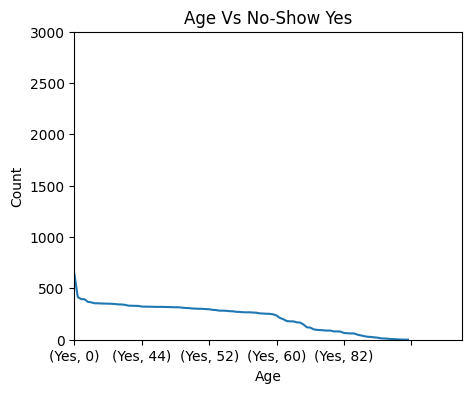

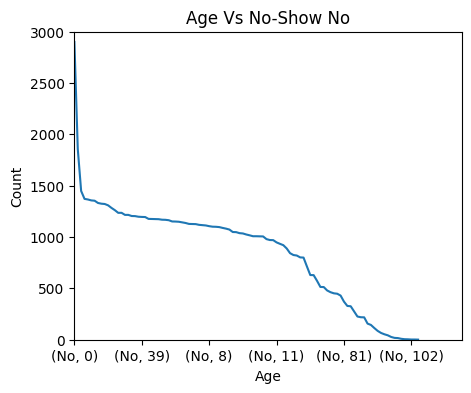

In [5]:
#Create No-show type specific 
no_show_yes = df[df["No-show"] == "Yes"]
no_show_no = df[df["No-show"] == "No"]


#Comparative Age Statistics
print(no_show_yes["Age"].value_counts().sort_index().head())
print(no_show_no["Age"].value_counts().sort_index().head())

#Creating Plotting Statistics
df_age_yes = no_show_yes.groupby("No-show")["Age"].value_counts()
df_age_no = no_show_no.groupby("No-show")["Age"].value_counts()

#Plotting Relationship
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)

plt.xlim([0,115])
plt.ylim([0,3000])

df_age_yes.plot(xlabel = "Age", ylabel = "Count", title = "Age Vs No-Show Yes")
plt.show()

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)

plt.xlim([0,115])
plt.ylim([0,3000])
df_age_no.plot(xlabel = "Age", ylabel = "Count", title = "Age Vs No-Show No")
plt.show()

>>Exploring AppointmentDay and ScheduledDay Feature

In [6]:
#Comparitive Statistics for Appointment Day
df_appointment_yes = no_show_yes.groupby("No-show")["AppointmentDay"].value_counts()
print(df_appointment_yes.head())

df_appointment_no = no_show_no.groupby("No-show")["AppointmentDay"].value_counts()
print(df_appointment_no.head())

No-show  AppointmentDay      
Yes      2016-05-16T00:00:00Z    1049
         2016-05-09T00:00:00Z    1019
         2016-05-10T00:00:00Z     992
         2016-05-04T00:00:00Z     973
         2016-05-17T00:00:00Z     935
Name: AppointmentDay, dtype: int64
No-show  AppointmentDay      
No       2016-06-06T00:00:00Z    3818
         2016-06-08T00:00:00Z    3705
         2016-06-01T00:00:00Z    3652
         2016-05-30T00:00:00Z    3626
         2016-06-07T00:00:00Z    3600
Name: AppointmentDay, dtype: int64


In [7]:
#Comparative Statistics for Appointment Day
df_scheduled_yes = no_show_yes.groupby("No-show")["ScheduledDay"].value_counts()
print(df_scheduled_yes.head())

df_scheduled_no = no_show_no.groupby("No-show")["ScheduledDay"].value_counts()
print(df_scheduled_no.head())

No-show  ScheduledDay        
Yes      2016-04-25T17:17:46Z    21
         2016-04-25T17:18:27Z    20
         2016-04-25T17:17:23Z    16
         2016-05-06T07:09:53Z    16
         2016-05-06T07:09:54Z    15
Name: ScheduledDay, dtype: int64
No-show  ScheduledDay        
No       2016-03-29T10:44:23Z    11
         2016-03-29T10:43:41Z    10
         2016-05-04T10:19:32Z     9
         2016-05-06T07:09:54Z     9
         2016-05-09T15:52:40Z     9
Name: ScheduledDay, dtype: int64


# Building The Model

In [8]:
#Converting Utilized Catagorical Variables to numbers

# 1 == Female 0 == Male
df["Gender"] = df["Gender"].eq("F").mul(1)

# 1 == Yes 0 == No
df["No-show"] = df["No-show"].eq("Yes").mul(1)

#Selecting the Prediction Target
y = df["No-show"]

#Choosing Features
no_show_features = ["SMS_received","Age","Alcoholism"]
X = df[no_show_features]

#Splitting Training Data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state= 0) 



In [9]:
#Creation Of Decision Tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)

#Fitting Tree with Training Data
decision_tree.fit(X_train,y_train)

#Predicting Results
y_pred = decision_tree.predict(X_test)
print(y_pred)



[0 0 0 ... 0 0 0]


# Report Metrics

In [10]:
#Metrics for Precision, Recall, F-Score
from sklearn.metrics import classification_report
# 0 = No/False No-show
# 1 = Yes/True No-show
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     29213
           1       1.00      0.00      0.00      7261

    accuracy                           0.80     36474
   macro avg       0.90      0.50      0.44     36474
weighted avg       0.84      0.80      0.71     36474



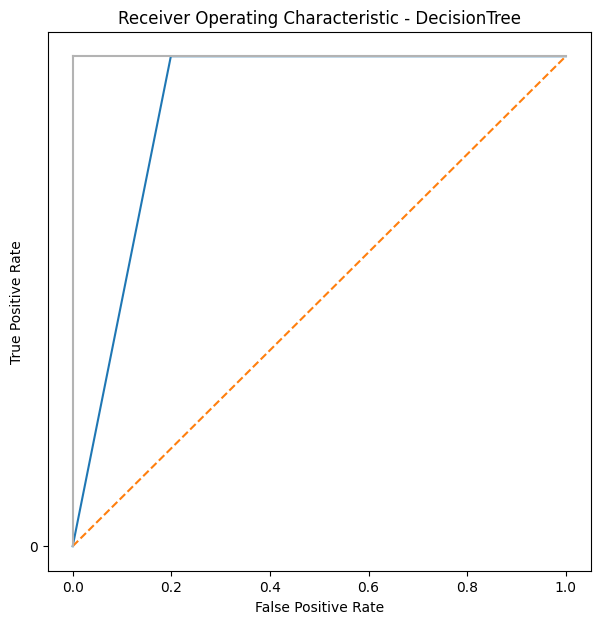

The ROC AUC Score is: 0.9004743234721575


In [11]:
#AUC Score
roc_auc = roc_auc_score(y_pred,y_test)

#ROC Plot

#We have to get False Positive Rates and True Postive ratesused to plot the ROC Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_pred, y_test)

#Plotting ROC Curve
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - DecisionTree')

plt.yticks(np.arange(true_positive_rate1.min(), true_positive_rate1.max()))
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()
print("The ROC AUC Score is: " + str(roc_auc))

The AUC score which is the area under the ROC curve is .9 in this case. This is classified as a good AUC score with great discrimination on observations into classes.

# Q2. Inductive Biases in the Decision Tree

Decision tree’s inductive bias lies within its depth and how much generalization occurs in the model. A low depth could show too much generalization in the model. On the other hand, too little generalization with too much depth. My model was not performing very well on the “True” result of the test dataset as well as the training dataset signaling underfitting. I believe my model may not be using the best attributes for information gain close to the model with my depth being on the shorter side. Precision high with a value of 1 in the model; however, the recall is 0. This shows an inductive bias to people showing up to work which is the False negative portion of the confusion matrix.